In [102]:
import matplotlib.pyplot as plt

In [180]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import model_from_json

In [103]:
import cv2
import numpy as np



In [181]:
font = cv2.FONT_HERSHEY_COMPLEX

In [104]:
img = cv2.imread("parking_bays_1.png", cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread("parking_bays_1.png")

In [105]:
_, threshold = cv2.threshold(img, 250, 255, cv2.THRESH_BINARY)

In [106]:
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [107]:
print("number of ontours:", len(contours))

number of ontours: 10


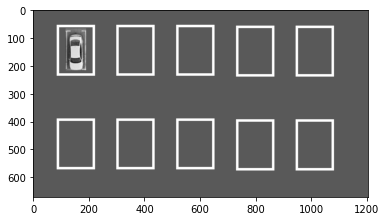

In [108]:
plt.imshow(img,cmap='gray')

In [109]:
parking_bay_count = 0
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
    cv2.drawContours(img, [approx], 0, (0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    #print(len(approx), approx)
    if len(approx) == 3:
        cv2.putText(img, "Triangle", (x, y), font, 1, (255))
    elif len(approx) == 4:
        parking_bay_count = parking_bay_count + 1
        cv2.putText(img, "Rectangle", (x, y), font, 1, (255))
    elif len(approx) == 5:
        cv2.putText(img, "Pentagon", (x, y), font, 1, (0))
    elif 6 < len(approx) < 15:
        cv2.putText(img, "Ellipse", (x, y), font, 1, (0))
    else:
        cv2.putText(img, "Circle", (x, y), font, 1, (0))

print("number of parking bays:", parking_bay_count)

number of parking bays: 10


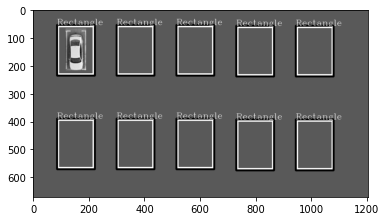

In [110]:
plt.imshow(img,cmap='gray')

In [111]:
approx = cv2.approxPolyDP(contours[9], 0.01*cv2.arcLength(cnt, True), True)
#print(approx[0][0])
top_left_point=tuple(approx[0][0])
bottom_right_point=tuple(approx[2][0])
cv2.rectangle(img_color,top_left_point,bottom_right_point,color=(255,0,0),thickness=3)

array([[[89, 89, 89],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]],

       [[89, 89, 89],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]],

       [[89, 89, 89],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]],

       ...,

       [[89, 89, 89],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]],

       [[89, 89, 89],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]],

       [[89, 89, 89],
        [89, 89, 89],
        [89, 89, 89],
        ...,
        [89, 89, 89],
        [89, 89, 89],
        [89, 89, 89]]], dtype=uint8)

In [112]:
tuple(approx[0][0])

(86, 53)

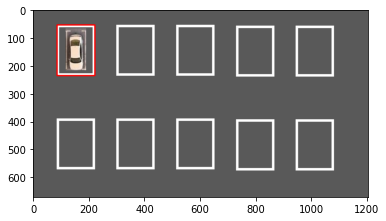

In [113]:
plt.imshow(img_color)

In [114]:
print(approx[0])
print(approx[1])
print(approx[2])
print(approx[3])

[[86 53]]
[[ 86 235]]
[[222 235]]
[[222  53]]


In [115]:
offset=40

In [147]:
img_crop = img[approx[0][0][0]:approx[2][0][0], approx[0][0][1]+offset:approx[2][0][1]-offset]

(136, 102)


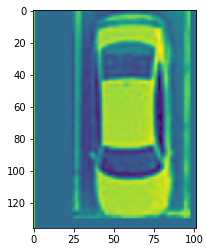

In [149]:
plt.imshow(img_crop)
print(img_crop.shape)

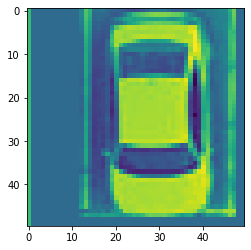

In [118]:
plt.imshow(cv2.resize(img_crop, (50,50)))

# Data Segmentation Pipeline

In [211]:
img = cv2.imread("parking_bays_2.png", cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread("parking_bays_2.png")

In [212]:
_, threshold = cv2.threshold(img, 250, 255, cv2.THRESH_BINARY)

(671, 1204, 3)


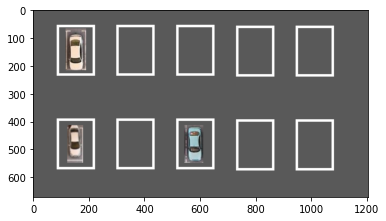

In [213]:
plt.imshow(img_color)

print(img_color.shape)

In [214]:
parking_bay_count = 0
parking_bounding_boxes_4_corners = []
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
    cv2.drawContours(img, [approx], 0, (0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1]
    #print(len(approx), approx)
    if len(approx) == 3:
        cv2.putText(img, "Triangle", (x, y), font, 1, (255))
    elif len(approx) == 4:
        parking_bay_count = parking_bay_count + 1
        #top_left_point=tuple(approx[0][0])
        #bottom_right_point=tuple(approx[2][0])
        parking_bounding_boxes_4_corners.append(approx)
        cv2.putText(img, "Rectangle", (x, y), font, 1, (255))
    elif len(approx) == 5:
        cv2.putText(img, "Pentagon", (x, y), font, 1, (0))
    elif 6 < len(approx) < 15:
        cv2.putText(img, "Ellipse", (x, y), font, 1, (0))
    else:
        cv2.putText(img, "Circle", (x, y), font, 1, (0))

print("number of parking bays:", parking_bay_count)

number of parking bays: 10


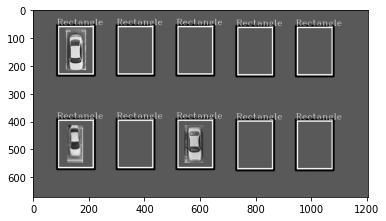

In [215]:
plt.imshow(img,cmap='gray')

In [216]:
#parking_bounding_boxes_4_corners

In [217]:
parking_bays_image_data=[]
parking_bays_rectangles_top_bottom_corners=[]
for box in parking_bounding_boxes:
    #print('Box:', box)
    
    top_left_point=tuple(box[0][0])
    bottom_right_point=tuple(box[2][0])
    
    parking_bays_rectangles_top_bottom_corners.append([top_left_point,bottom_right_point])
    print('Rectangle Points:', top_left_point, bottom_right_point)
    
    #CROP IMAGE of each parking bay and append the cropped image data
    # dim-1 is height, is dim-0 is width
    # for rectangle dimensions (944, 392) (1080, 575), 
    #extract portion of image starting from height: 392 to 572 and
    # width 944 to 1080
    bay = img_color[top_left_point[1]:bottom_right_point[1],top_left_point[0]:bottom_right_point[0] ]
    
    
    parking_bays_image_data.append(bay)

Rectangle Points: (944, 392) (1080, 575)
Rectangle Points: (730, 392) (866, 575)
Rectangle Points: (515, 389) (651, 571)
Rectangle Points: (300, 389) (436, 571)
Rectangle Points: (86, 389) (222, 571)
Rectangle Points: (944, 56) (1080, 238)
Rectangle Points: (730, 56) (866, 238)
Rectangle Points: (515, 53) (651, 235)
Rectangle Points: (300, 53) (436, 235)
Rectangle Points: (86, 53) (222, 235)


In [218]:
len(parking_bays_image_data)

10

In [219]:
type(parking_bays_image_data[0])

numpy.ndarray

In [220]:
parking_bays_image_data[0].shape

(183, 136, 3)

In [221]:
parking_bays_image_data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [222]:
parking_bays_rectangles[0]

[(944, 392), (1080, 575)]

In [223]:
b1=parking_bays_rectangles[0]
print(b1)
print(img.shape)
img_crop = img[b1[0][1]:b1[1][1], b1[0][0]:b1[1][0]]

[(944, 392), (1080, 575)]
(671, 1204)


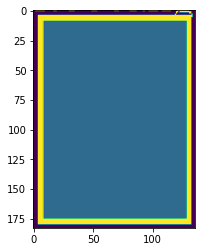

In [224]:
plt.imshow(img_crop)

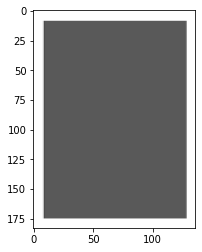

In [225]:
plt.imshow(parking_bays_image_data[0])

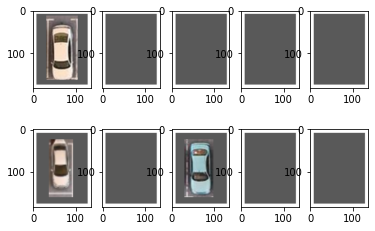

In [226]:
for i in range(len(parking_bays_image_data)):
    plt.subplot(2,5,i+1)
    plt.imshow(parking_bays_image_data[9-i]) #the indexes are reversed in cv2 contours boxes


### Predict parking space status

In [227]:
img_width, img_height = 48, 48

In [228]:
# load json and create model
json_file = open('carpark_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("carpark_model.h5")
print("Loaded model from disk")
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

Loaded model from disk


In [229]:
number_of_bays = len(parking_bays_image_data)-1
for i in range(len(parking_bays_image_data)):
    bay_img = cv2.resize(parking_bays_image_data[number_of_bays-i], (img_width,img_height))
    bay_img = bay_img.reshape(1,img_width,img_height,3)
    status = loaded_model.predict(bay_img)
    if status > 0.5:
        print('i:' , 'Occupied')
        cv2.rectangle(img_color,
                     parking_bays_rectangles_top_bottom_corners[number_of_bays-i][0], 
                     parking_bays_rectangles_top_bottom_corners[number_of_bays-i][1],
                     color=(255,0,0),thickness=3)
    else:
        print('i:' , 'Free')
        cv2.rectangle(img_color,
                     parking_bays_rectangles_top_bottom_corners[number_of_bays-i][0], 
                     parking_bays_rectangles_top_bottom_corners[number_of_bays-i][1],
                     color=(0,255,0),thickness=3)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
i: Occupied
i: Free
i: Free
i: Free
i: Free
i: Occupied
i: Free
i: Occupied
i: Free
i: Free


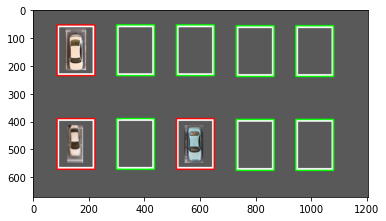

In [230]:
plt.imshow(img_color)

In [206]:
parking_bays_rectangles_top_bottom_corners[0]

[(944, 392), (1080, 575)]